In [5]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
from jax import grad
import jax
import numpy as np
import math
import keras
%matplotlib inline
from jaxmodel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test model

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz", )
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

def batch(x, y, batch_size=32):
    if len(x) % batch_size != 0:
        x = x[:batch_size * (len(x)//batch_size)]
        y=y[:batch_size*(len(x)//batch_size)]
    return np.array_split(x, len(x) / batch_size, axis=0), np.array_split(y, len(y)/batch_size, axis=0)

def fix_data(x, y):
    x = x.reshape(x.shape[0], 28*28)/255
    test = np.zeros((x.shape[0], 10))
    test[np.arange(x.shape[0]),y] = 1
    return (x, test)

fixed_x, fixed_y = fix_data(x_train[:1000], y_train[:1000])
b_x , b_y = batch(fixed_x, fixed_y, 32)
x_test, y_test = batch(*fix_data(x_test, y_test))



In [12]:
jaxmodel = JaxModel(28*28, 10, [ 8, 16], jax_mse, jax_sigmoid)
datas = []
for _epoch in range(20):
    print(f"starting epoch {_epoch}")
    datas.append(jaxmodel.train_epoch(b_x, b_y,  (x_test, y_test), lr=1e-2 ))

starting epoch 0
[[0.10357137 0.1945428  0.11814262 0.16535091 0.1439643  0.11616105
  0.13524471 0.16048717 0.09419838 0.14566338]
 [0.08319637 0.20018408 0.10068533 0.15580301 0.13773796 0.10766921
  0.11662394 0.13828613 0.06680078 0.12160485]
 [0.12079762 0.22956833 0.12537268 0.15558393 0.16256039 0.12978324
  0.1492132  0.15932664 0.1171627  0.1530259 ]
 [0.02944976 0.1042136  0.04033505 0.09194732 0.05482782 0.03781518
  0.05144139 0.0626274  0.02218151 0.06542802]
 [0.12937178 0.22055319 0.14821161 0.18119363 0.17482063 0.14644918
  0.15915191 0.1809927  0.12144432 0.17226017]
 [0.0892517  0.20131856 0.09448509 0.12875777 0.12790139 0.09642226
  0.11677265 0.12178193 0.08325285 0.12259785]
 [0.16569844 0.24376889 0.17951523 0.20313409 0.20130195 0.17585394
  0.17685367 0.20745246 0.15852281 0.18564369]
 [0.05973738 0.14377499 0.07084037 0.10354534 0.09046611 0.06609812
  0.08990372 0.09193107 0.06194225 0.10162576]
 [0.04393169 0.12918273 0.05609831 0.10164014 0.07596502 0.0539

KeyboardInterrupt: 

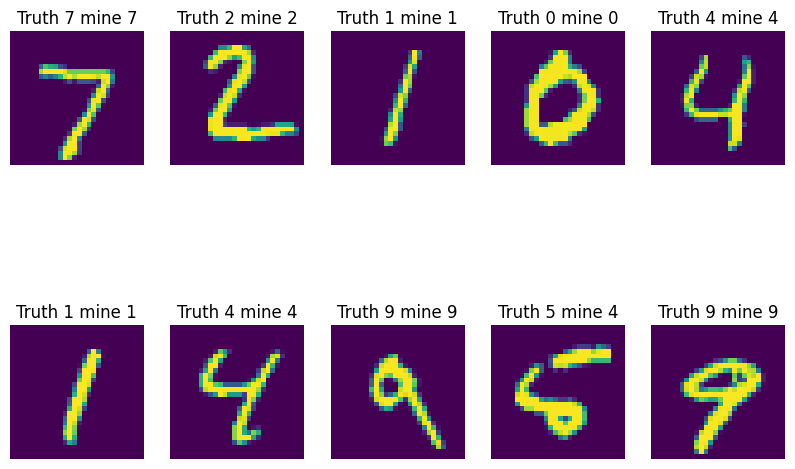

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = jaxmodel.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine {jnp.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()
